# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
insurance_data = pd.read_csv("insurance_datasets/insurance.csv")
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data[:].isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
uniqueValuesSex = (insurance_data['sex']).unique()
uniqueValuesSex

array(['female', 'male'], dtype=object)

In [8]:
uniqueValuesSmoker = (insurance_data['smoker']).unique()
uniqueValuesSmoker

array(['yes', 'no'], dtype=object)

In [9]:
uniqueValuesRegion = (insurance_data['region']).unique()
uniqueValuesRegion

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
textual_data = ['sex', 'smoker', 'region']

In [11]:
encoder = LabelEncoder()
df = insurance_data.copy()
for col in textual_data:
    df[col] = encoder.fit_transform(insurance_data[col])
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [12]:
corr_matrix = df.corr()
corr_matrix

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

C:\Users\Echo\AppData\Local\Temp\ipykernel_15312\2954746229.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr_matrix.columns)
C:\Users\Echo\AppData\Local\Temp\ipykernel_15312\2954746229.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(corr_matrix.columns)


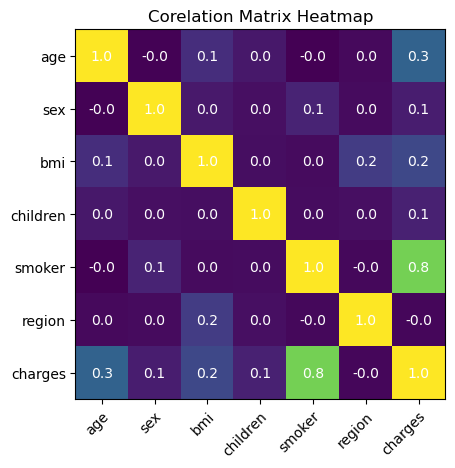

In [13]:
fig, ax = plt.subplots()
corr_matrix = df.corr()
im = ax.imshow(corr_matrix)

ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, '{:.1f}'.format(corr_matrix.iloc[i, j]),
                       ha="center", va="center", color="w")

plt.title('Corelation Matrix Heatmap')
plt.show()

# Performing Summary Statistics

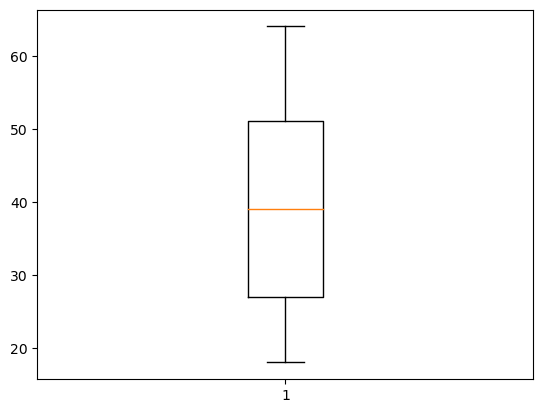

In [14]:
plt.boxplot((df.age))
plt.show()

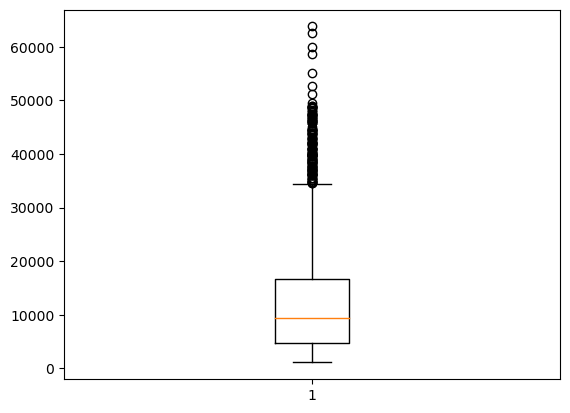

In [15]:
plt.boxplot((df.charges))
plt.show()

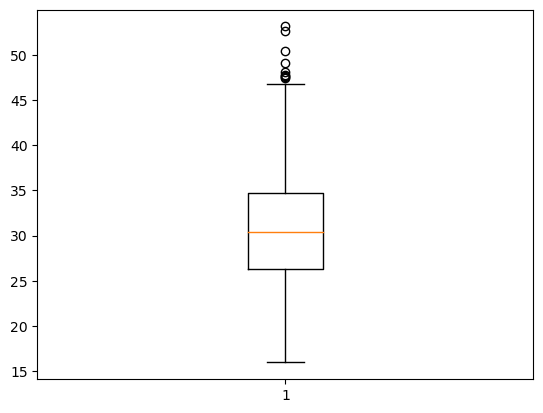

In [16]:
plt.boxplot((df.bmi))
plt.show()

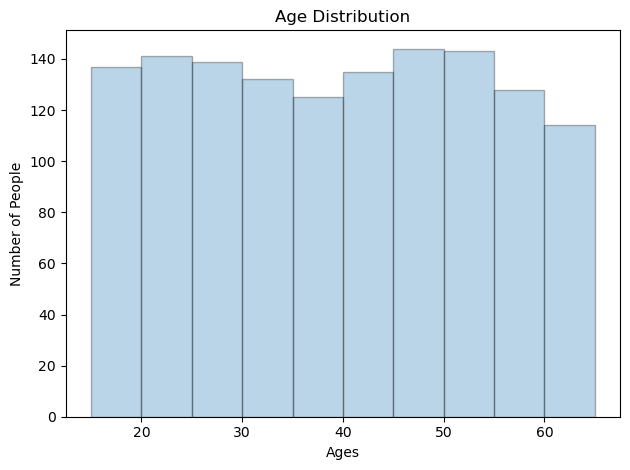

In [17]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
plt.hist(df['age'], bins=bins, edgecolor='black',  alpha=0.3)
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Number of People')
plt.tight_layout()
#plt.savefig('age_distribution.jpg')

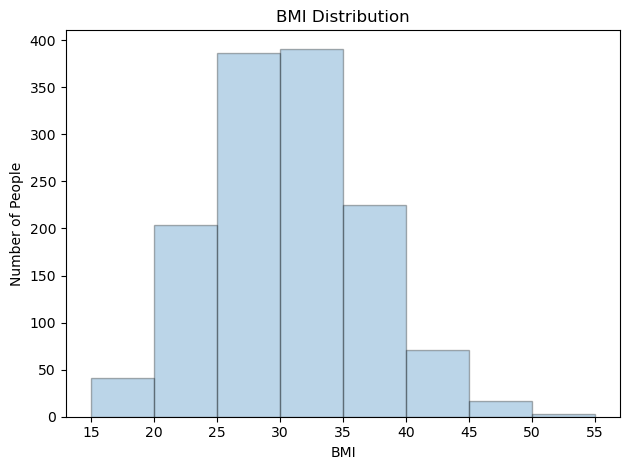

In [18]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]
plt.hist(df['bmi'], bins=bins, edgecolor='black',  alpha=0.3)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.tight_layout()
#plt.savefig('age_distribution.jpg')

In [19]:
region_population = df.groupby('region')['region'].agg('count')
region_population

region
0    324
1    325
2    364
3    325
Name: region, dtype: int64

In [20]:
regions = np.arange(4)
region_population = np.array(region_population)

plt.figure()
#ax = fig.add_axes([0, 0, 1, 1])
ax.bar(regions, region_population)
plt.show()

<Figure size 640x480 with 0 Axes>

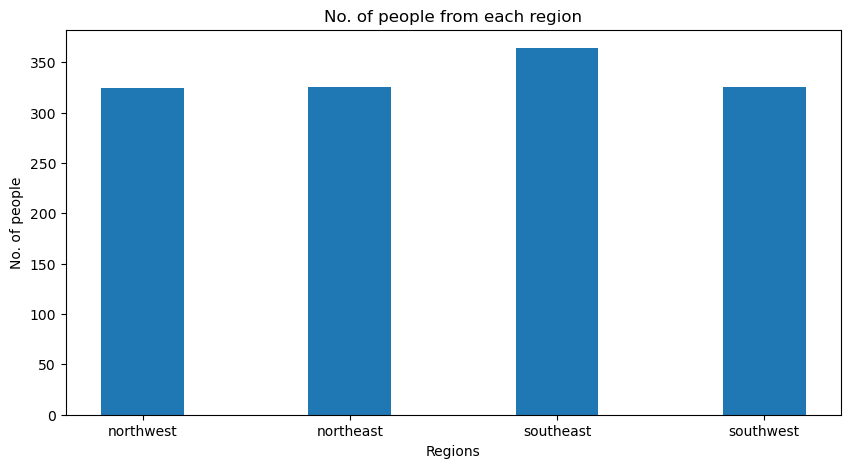

In [21]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(regions, region_population, width = 0.4)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['northwest', 'northeast', 'southeast', 'southwest'])
plt.xlabel("Regions")
plt.ylabel("No. of people")
plt.title("No. of people from each region")
plt.show()

In [22]:
n_people_with_children = []

for i in range(len(df)):
    if df.children[i] > 0:
        n_people_with_children.append(1)

n_people_with_no_children = df.shape[0] - sum(n_people_with_children)

print("Number of people with children: ", sum(n_people_with_children))
print("Number of people with no children: ", n_people_with_no_children)

Number of people with children:  764
Number of people with no children:  574


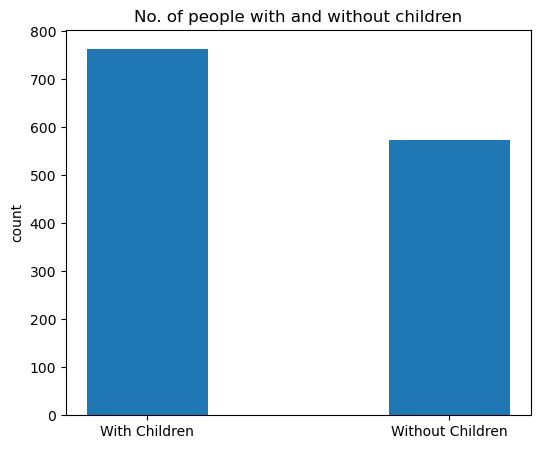

In [23]:
children_data = {'With Children': sum(n_people_with_children), 
        'Without Children': n_people_with_no_children
       }
labels = list(children_data.keys())
counts = list(children_data.values())

fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(labels, counts, width = 0.4)
plt.xticks(ticks = [0, 1], labels = ['With Children', 'Without Children'])
plt.ylabel("count")
plt.title("No. of people with and without children")
plt.show()

In [24]:
df.groupby('smoker')['smoker'].agg('count')

smoker
0    1064
1     274
Name: smoker, dtype: int64

Number of Non-Somkers:  1064
Number of Smokers :  274


C:\Users\Echo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


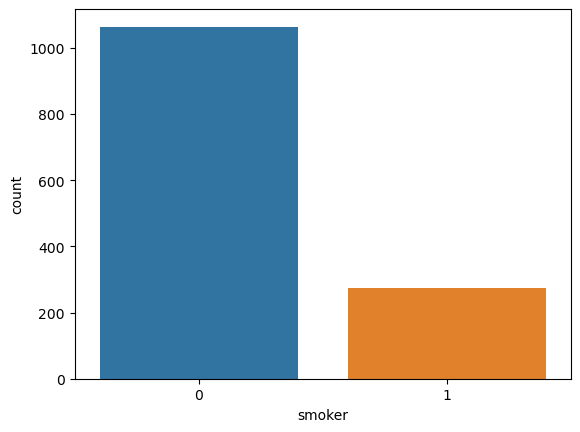

In [25]:
ax = sns.countplot(df.smoker, label = "Count")
Ns, S = df.smoker.value_counts()
print('Number of Non-Somkers: ',Ns)
print('Number of Smokers : ',S)

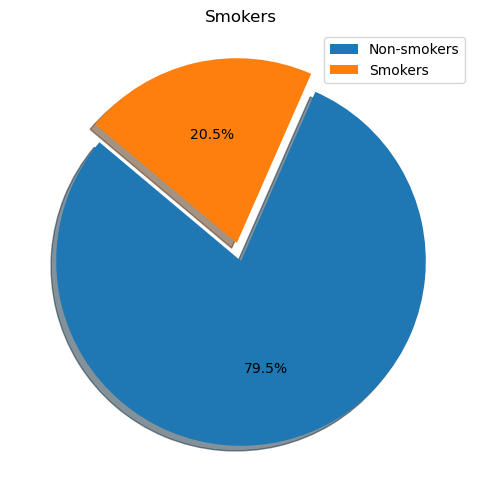

In [26]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['smoker'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Non-smokers','Smokers'])
plt.title('Smokers')
plt.axis('off')
plt.show()

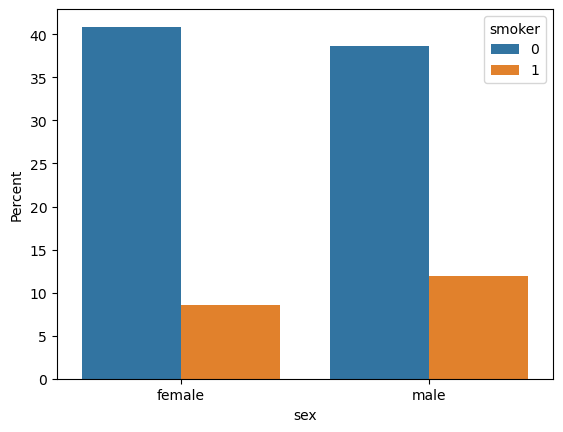

In [27]:
ax = sns.barplot(x="sex", y="sex", hue="smoker", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
ax.set(xticklabels=['female', 'male'])
plt.show()

In [28]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

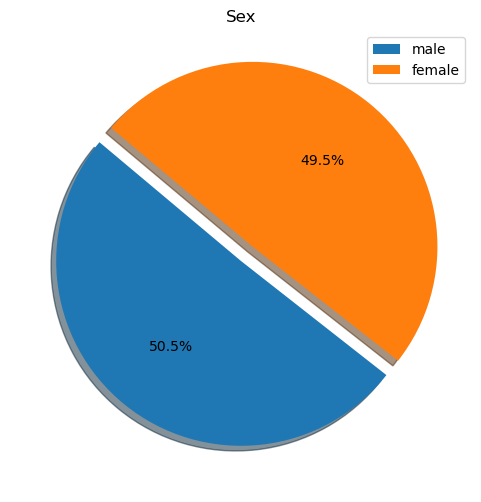

In [29]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['sex'].value_counts(), explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['male','female'])
plt.title('Sex')
plt.axis('off')
plt.show()

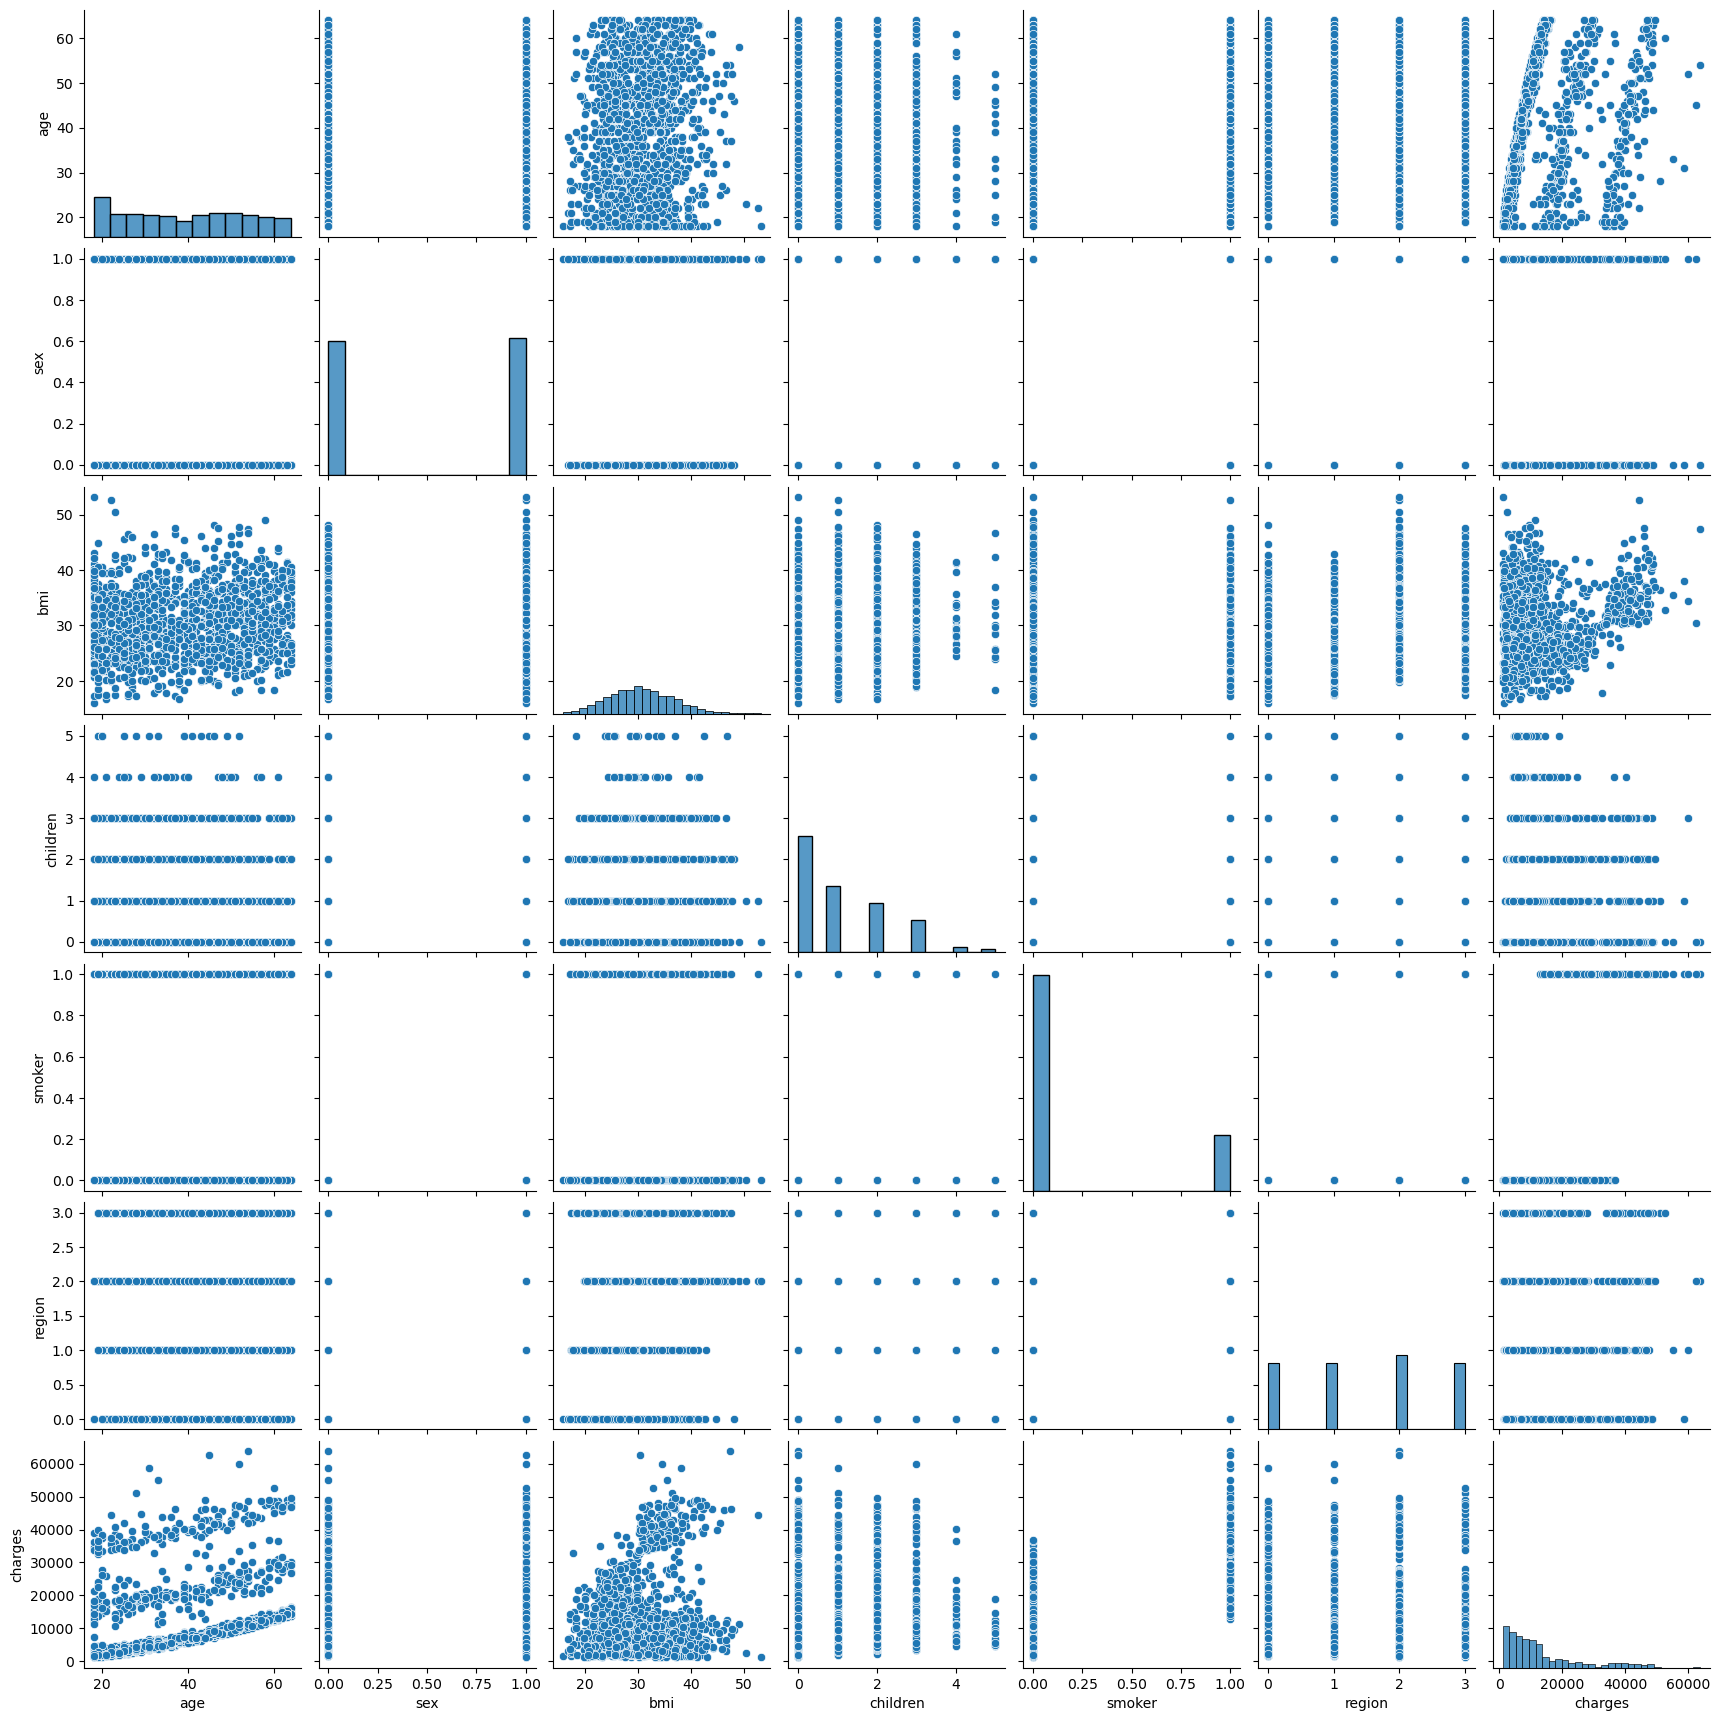

In [30]:
sns.pairplot(df);

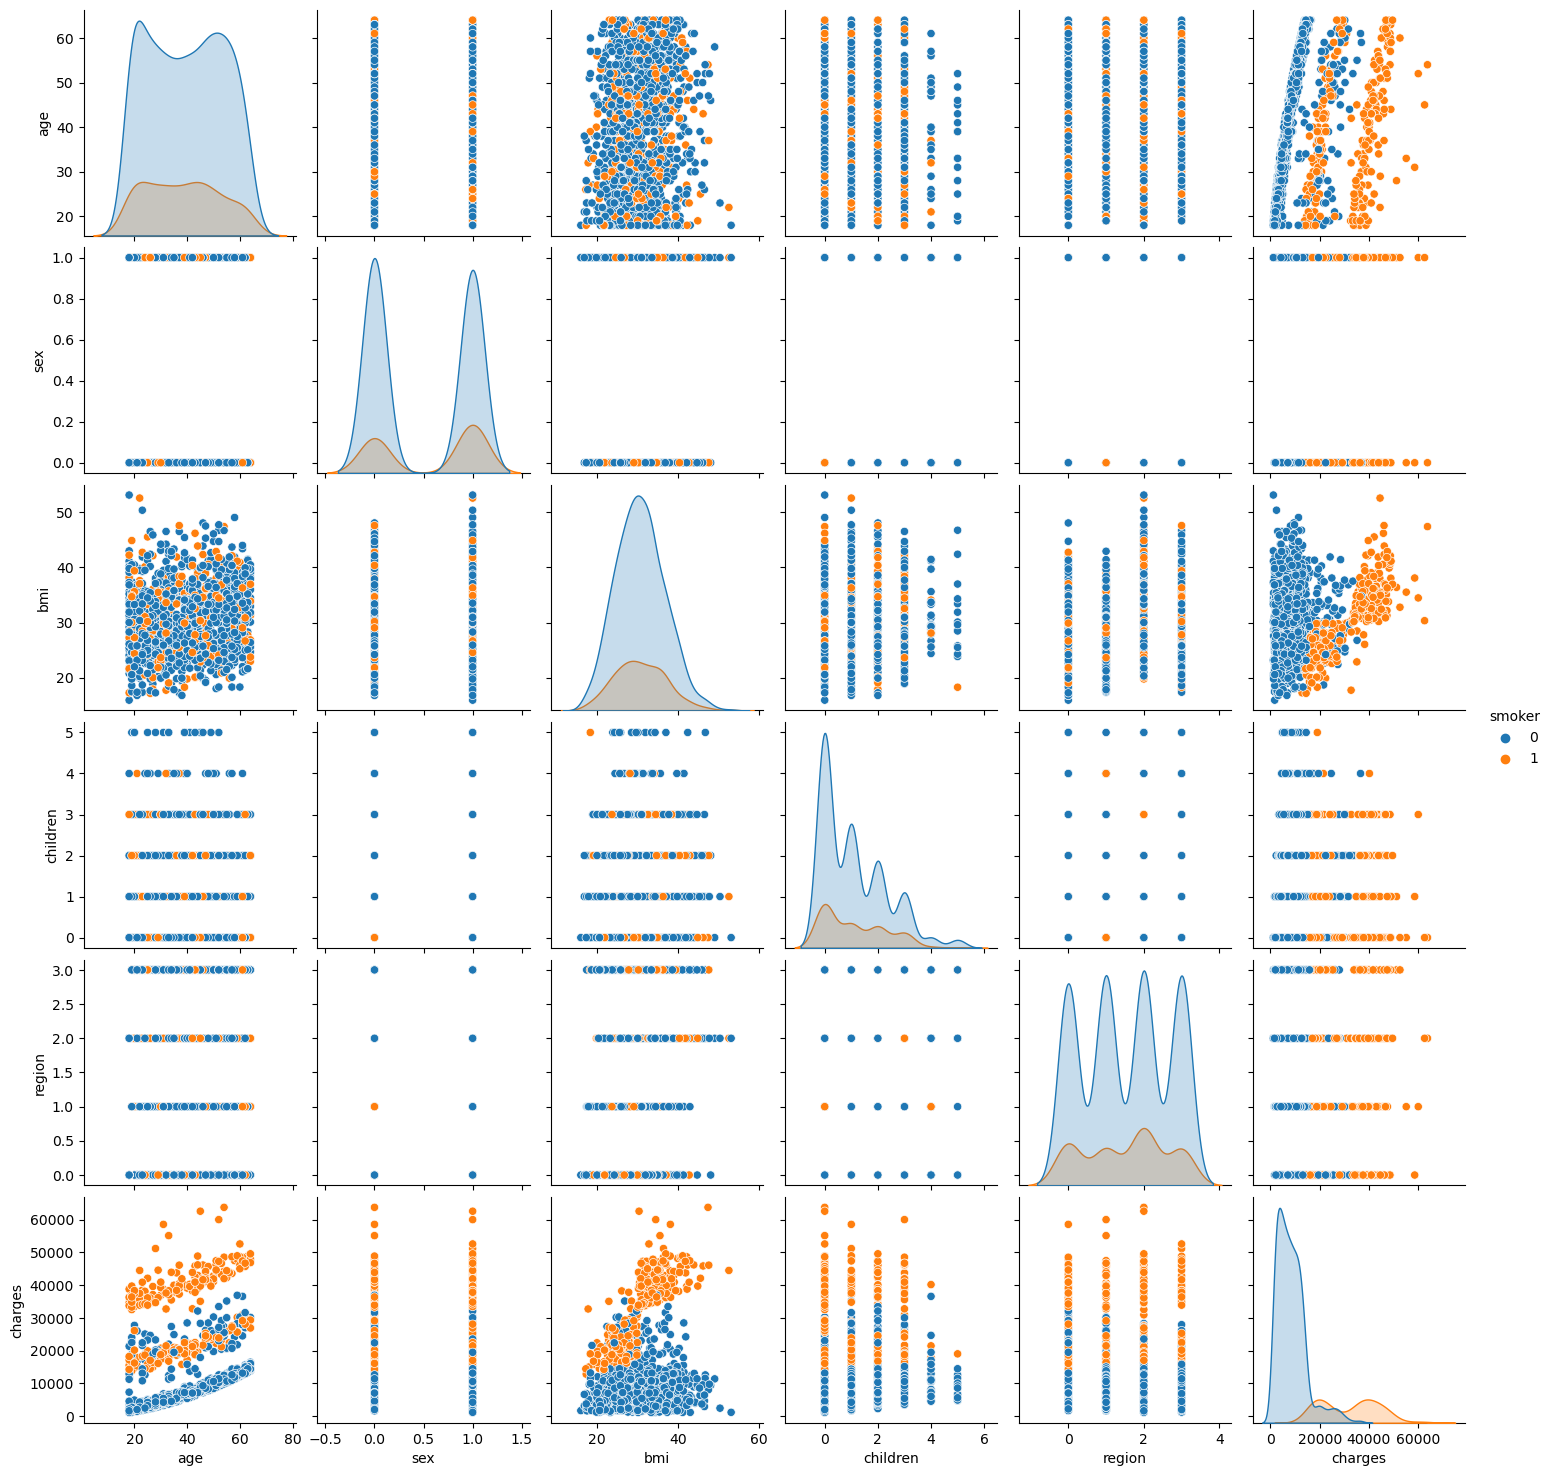

In [31]:
sns.pairplot(df, hue='smoker')

# Performing Principal Component Analysis

# Performing Unsupervised Learning

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

kmeans = KMeans(n_clusters = 2)
kmeans.fit_transform(df)
y_kmeans = kmeans.predict(df)

In [33]:
np.unique(kmeans.labels_)

array([0, 1])

In [34]:
#y_kmeans

In [35]:
sil_score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % sil_score)

Silhouetter Score: 0.734


In [36]:
sil_scores = []

In [37]:
for i in range(2, 50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_transform(df)
    y_kmeans = kmeans.predict(df)
    sil_scores.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))

In [38]:
len(sil_scores)

48

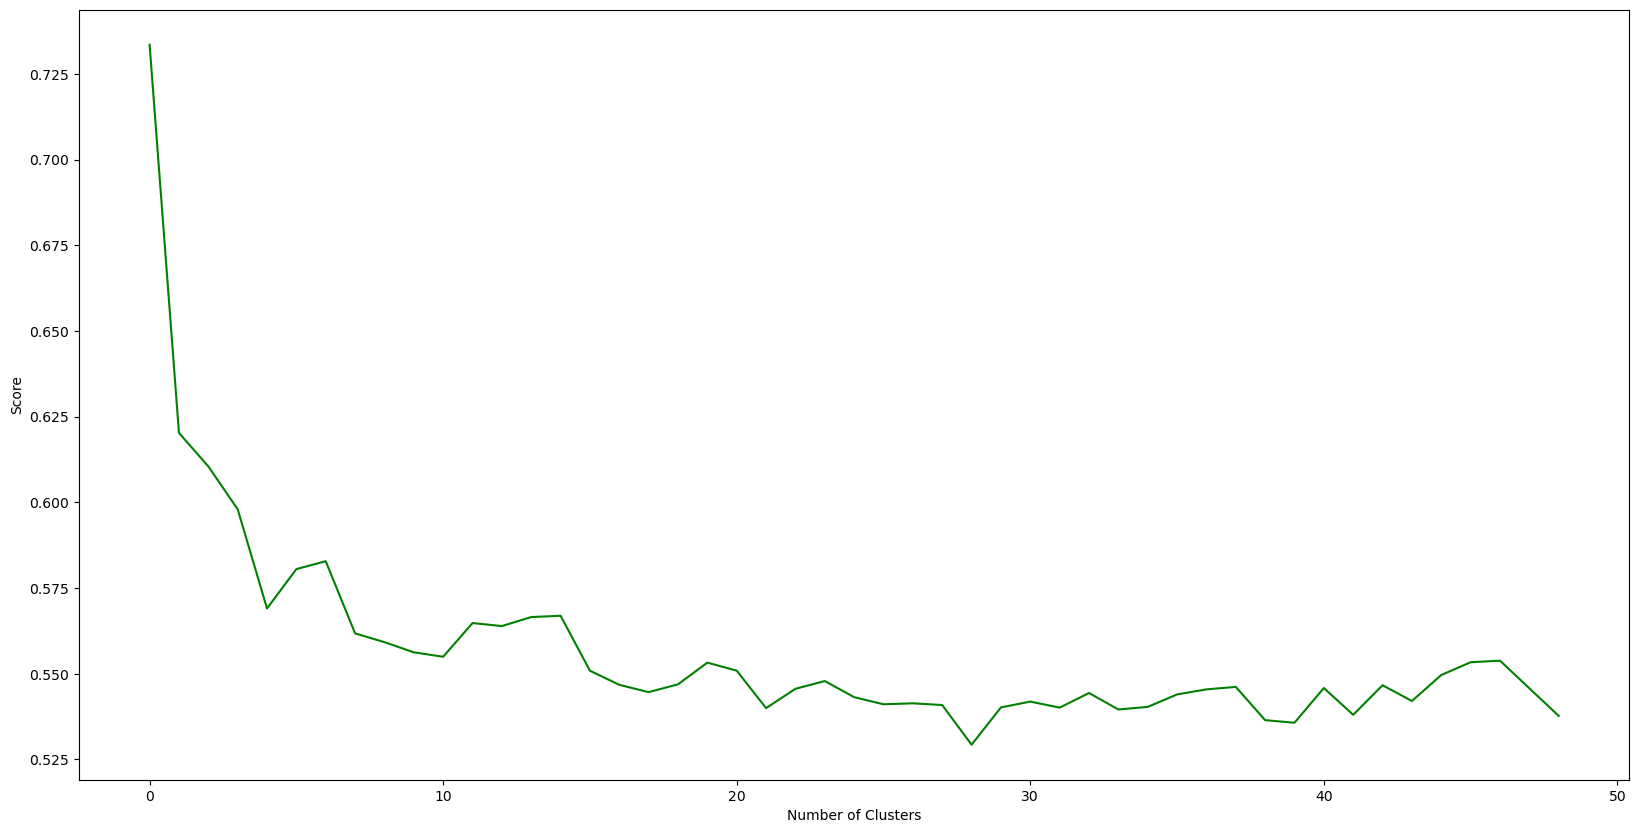

In [39]:
x = np.linspace(0, 48, 48, dtype = int)
plt.figure(figsize=(20, 10))
plt.plot(x, sil_scores, color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.savefig('Silhouette Score Plot');

In [40]:
"""
com_score = homogeneity_score(X_test, kmeans.labels_)
print('Completeness Score: %.3f' % com_score)
"""

"\ncom_score = homogeneity_score(X_test, kmeans.labels_)\nprint('Completeness Score: %.3f' % com_score)\n"

In [41]:
"""
hom_score = homogeneity_score(y_kmeans, kmeans.labels_)
print('homogeneity Score: %.3f' % hom_score)
"""

"\nhom_score = homogeneity_score(y_kmeans, kmeans.labels_)\nprint('homogeneity Score: %.3f' % hom_score)\n"

In [42]:
"""
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, marker = 'x', alpha=0.5);
"""

"\nplt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')\n\ncenters = kmeans.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, marker = 'x', alpha=0.5);\n"

In [43]:
sse = []
k_rng = range(1, 10)
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(df)
    sse.append(km.inertia_)
print(sse)

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[196074539341.69, 48015233363.631546, 22969418901.039963, 12124928462.89136, 8541856826.180522, 6166595475.291731, 4434721647.703516, 3491461044.907222, 2776435117.0952578]


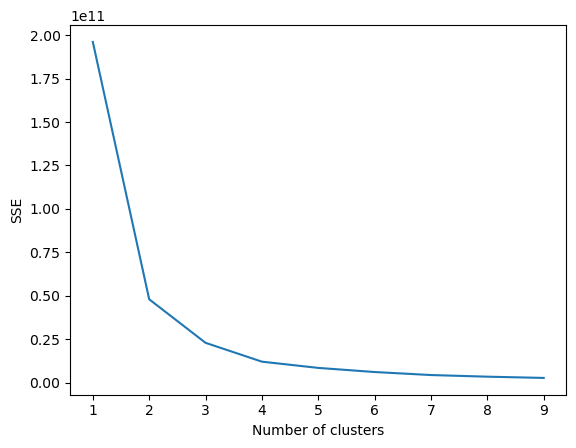

In [44]:
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE');

# Performing Supervised Learning

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df.charges, test_size=0.3)

In [46]:
print('Number of record in X_train: ', len(X_train))
print('Number of record in X_test: ', len(X_test))
print('Number of record in y_train: ', len(y_train))
print('Number of record in y_test: ', len(y_test))

Number of record in X_train:  936
Number of record in X_test:  402
Number of record in y_train:  936
Number of record in y_test:  402


In [47]:
X_train.head()

age  sex     bmi  children  smoker  region
500    29    1  34.400         0       1       3
24     37    1  28.025         2       0       1
1012   61    0  33.330         4       0       2
835    42    1  35.970         2       0       2
1087   57    1  31.540         0       0       1

In [48]:
y_train.head()

500     36197.69900
24       6203.90175
1012    36580.28216
835      7160.33030
1087    11353.22760
Name: charges, dtype: float64

In [49]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
reg.coef_

array([  261.55212129,  -227.70529647,   316.76320827,   518.07958701,
       23296.60817813,  -136.44661756])

In [51]:
reg.intercept_

-11811.487110516344

In [52]:
mscore = reg.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore*100, '%')

Our model performs with the accuracy of : 76.77683623257319 %


In [53]:
y_test.head()

405     11396.9002
1010     8269.0440
109     47055.5321
1000    17361.7661
1249    37607.5277
Name: charges, dtype: float64

In [54]:
X_test.head()

age  sex    bmi  children  smoker  region
405    52    0  38.38         2       0       0
1010   48    0  22.80         0       0       3
109    63    1  35.09         0       1       2
1000   30    1  22.99         2       1       1
1249   32    1  33.63         1       1       0

In [55]:
y_predict = reg.predict(X_test)
len(y_predict)


402

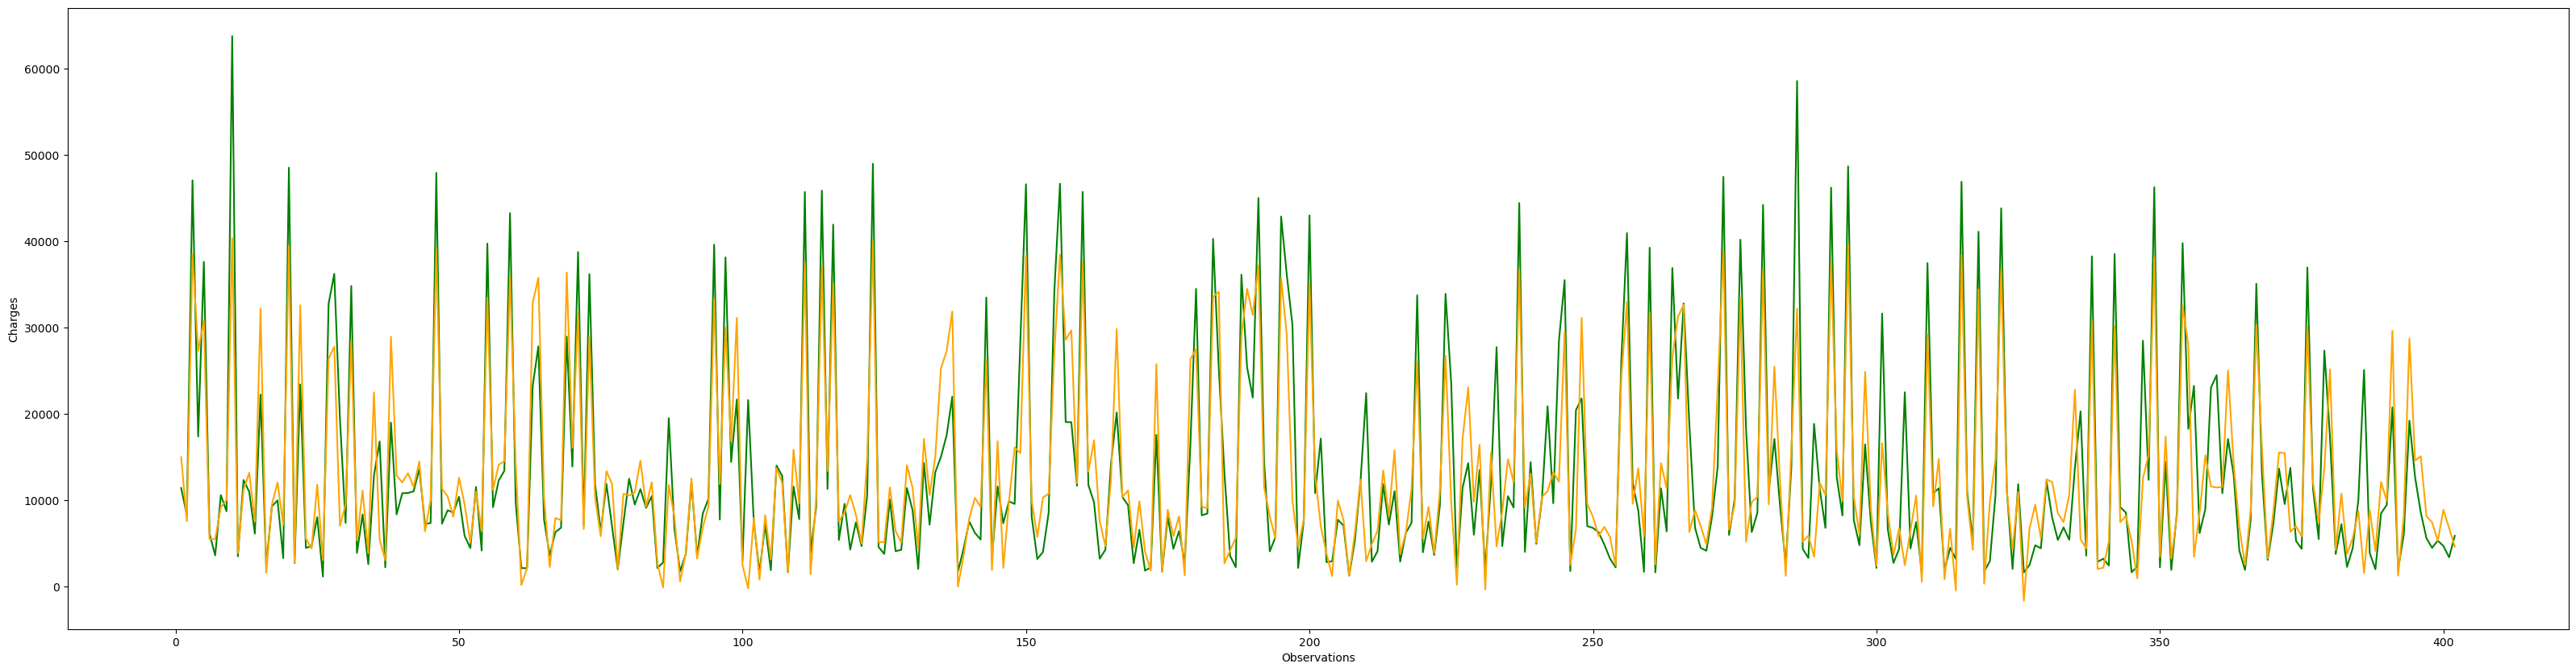

In [56]:
x = np.linspace(1, 402, 402, dtype = int)
plt.figure(figsize=(40, 10))
plt.plot(x, y_test, color='green')
plt.plot(x, y_predict, color = 'orange')
plt.xlabel('Observations')
plt.ylabel('Charges')
plt.savefig('Predicted vs Real');

In [58]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
y_pred_dt = dt.predict(X_test)

In [68]:
mscore = dt.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore*100, '%')

Our model performs with the accuracy of : 73.07487876512481 %


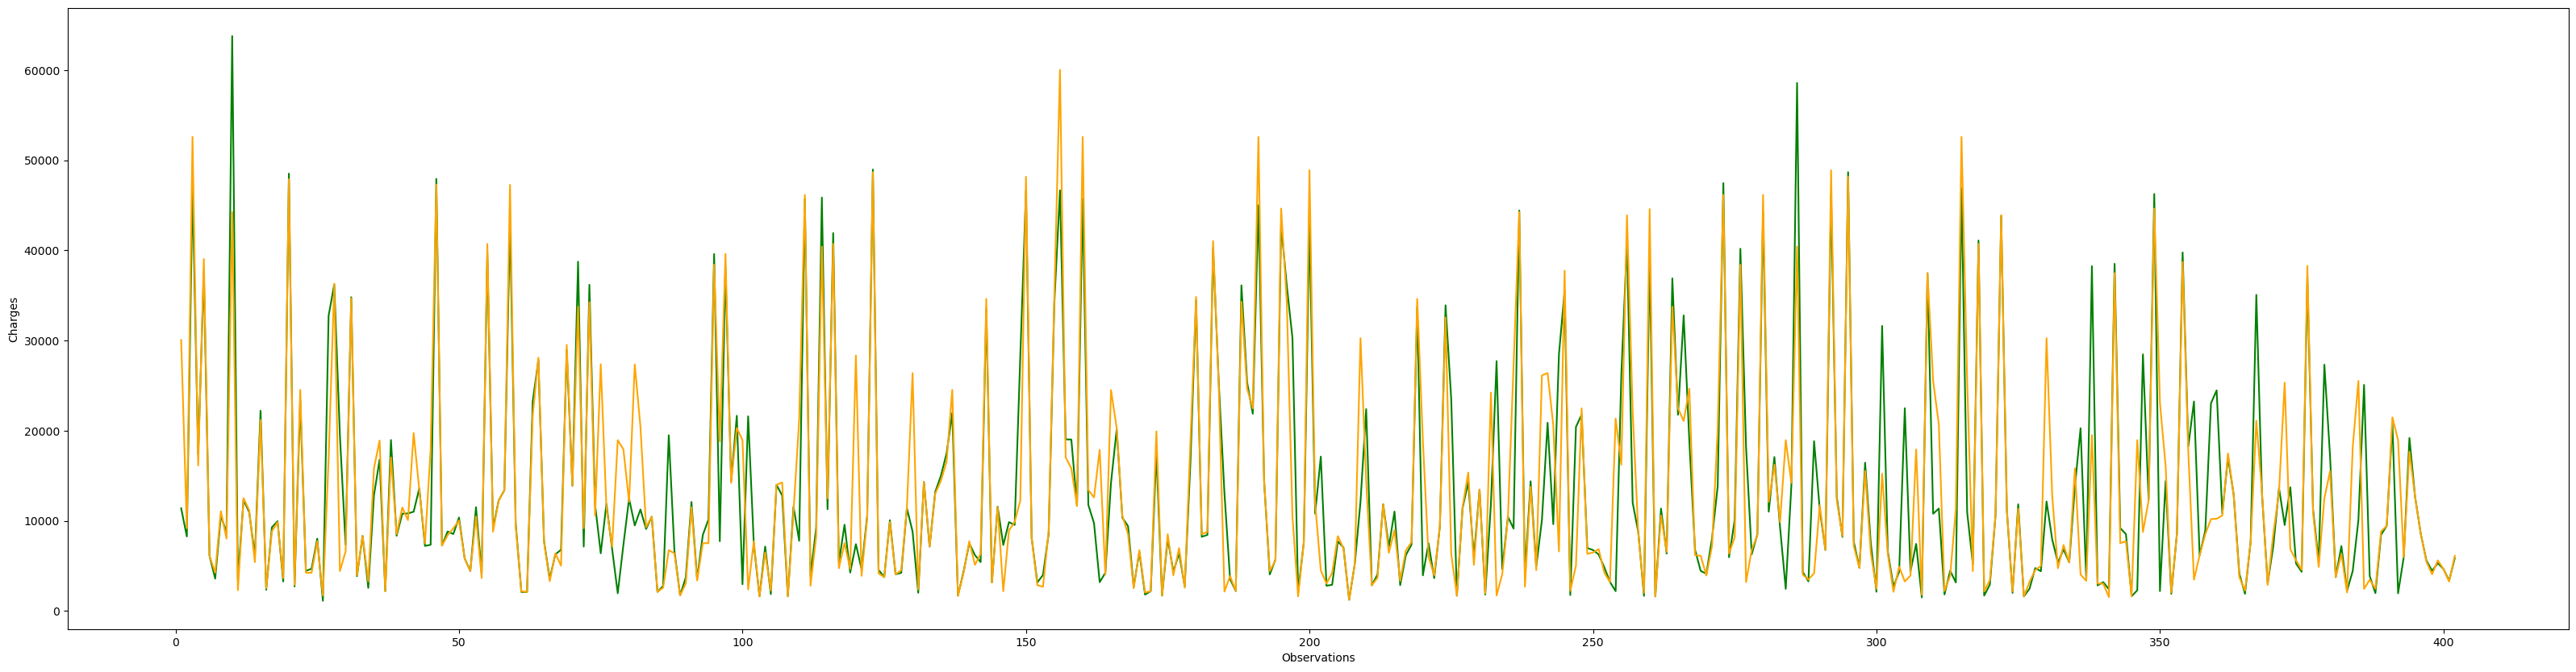

In [61]:
x = np.linspace(1, 402, 402, dtype = int)
plt.figure(figsize=(40, 10))
plt.plot(x, y_test, color='green')
plt.plot(x, y_pred_dt, color = 'orange')
plt.xlabel('Observations')
plt.ylabel('Charges')
plt.savefig('Predicted vs Real');

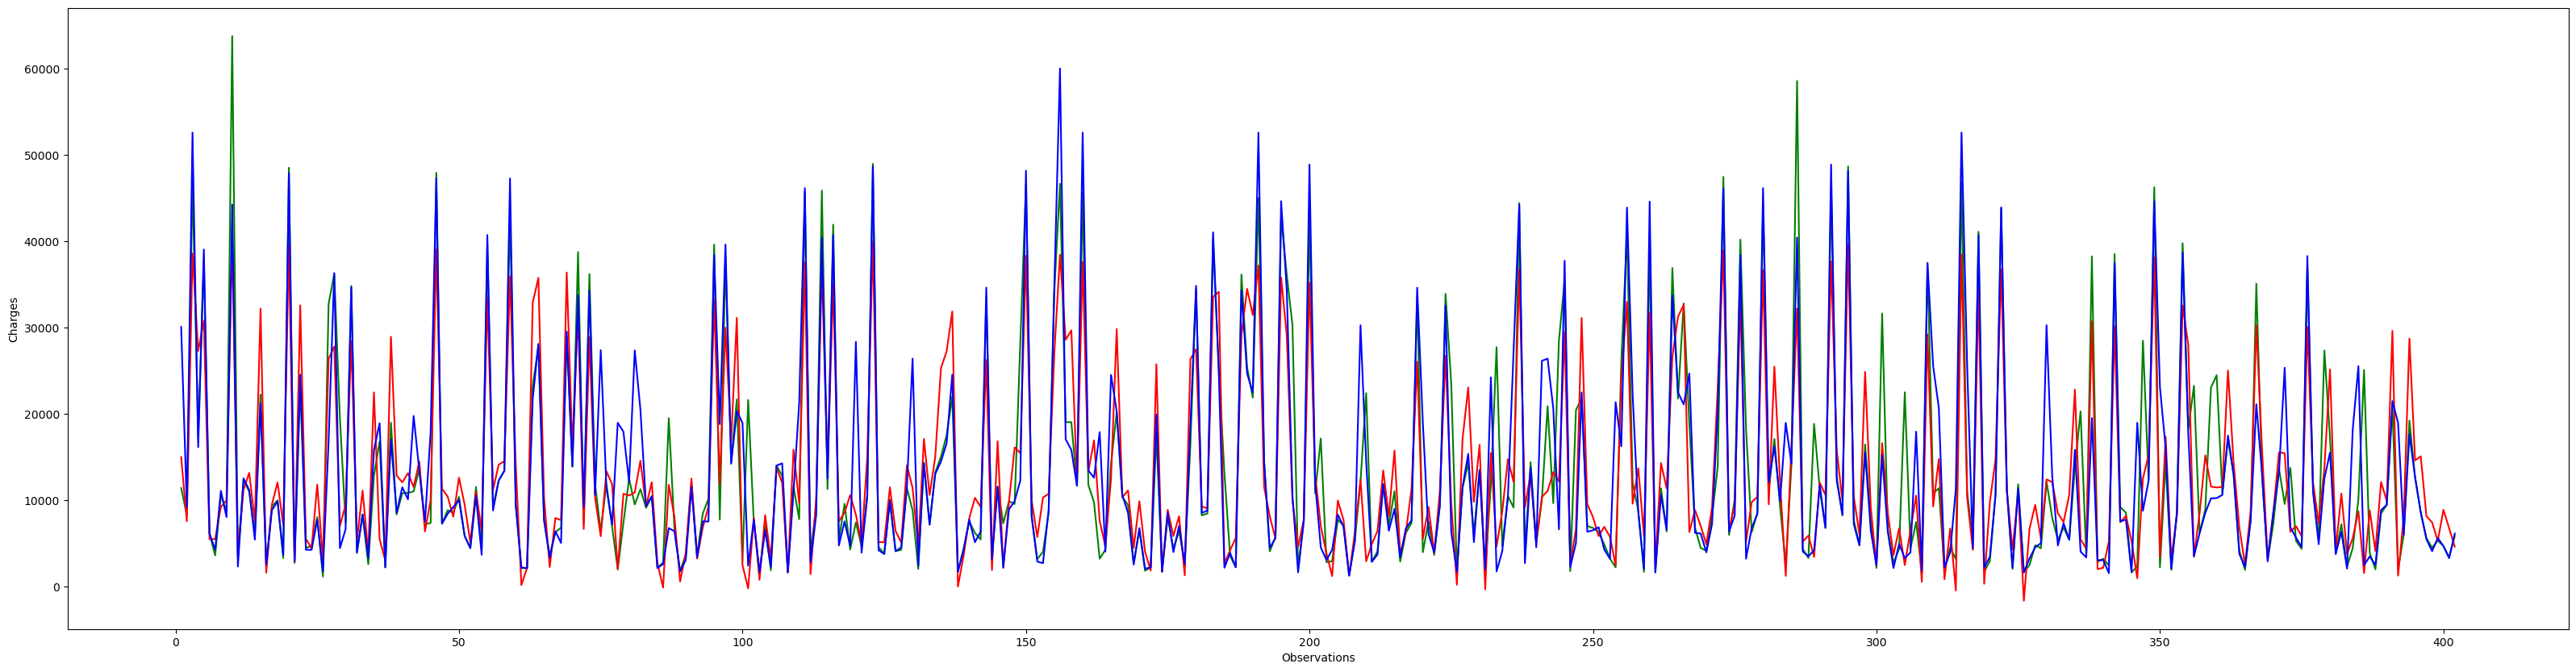

In [62]:
x = np.linspace(1, 402, 402, dtype = int)
plt.figure(figsize=(40, 10))
plt.plot(x, y_test, color='green')
plt.plot(x, y_predict, color = 'red')
plt.plot(x, y_pred_dt, color = 'blue')
plt.xlabel('Observations')
plt.ylabel('Charges')
plt.savefig('Predicted vs Real');

In [69]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [70]:
model_params = {
    'linear_regression' : {
        'model' : linear_model.LinearRegression(),
        'params' : {
            'fit_intercept' : [False, True],
            'normalize' : [True, False],
            'n_jobs' : [None, 1, 5, 10]
        } 
    },
    'decision_tree_regression' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter' : ['best', 'random']
        }
    }
}

In [72]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(df.drop('charges', axis=1), df.charges)
    scores.append({
        'model': model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

In [73]:
scores

[{'model': 'linear_regression',
  'best_score': 0.7472559473580954,
  'best_params': {'fit_intercept': True, 'n_jobs': None, 'normalize': True}},
 {'model': 'decision_tree_regression',
  'best_score': 0.7222213612457613,
  'best_params': {'criterion': 'absolute_error', 'splitter': 'best'}}]

In [78]:
reg_fin = linear_model.LinearRegression(fit_intercept = True, n_jobs = None, normalize = True)
reg_fin.fit(X_train, y_train)

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [79]:
reg_fin.coef_

array([  261.55212129,  -227.70529647,   316.76320827,   518.07958701,
       23296.60817813,  -136.44661756])

In [80]:
reg_fin.intercept_

-11811.487110516358

In [81]:
mscore = reg_fin.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore*100, '%')

Our model performs with the accuracy of : 76.7768362325732 %


In [84]:
y_predict_fin = reg_fin.predict(X_test)

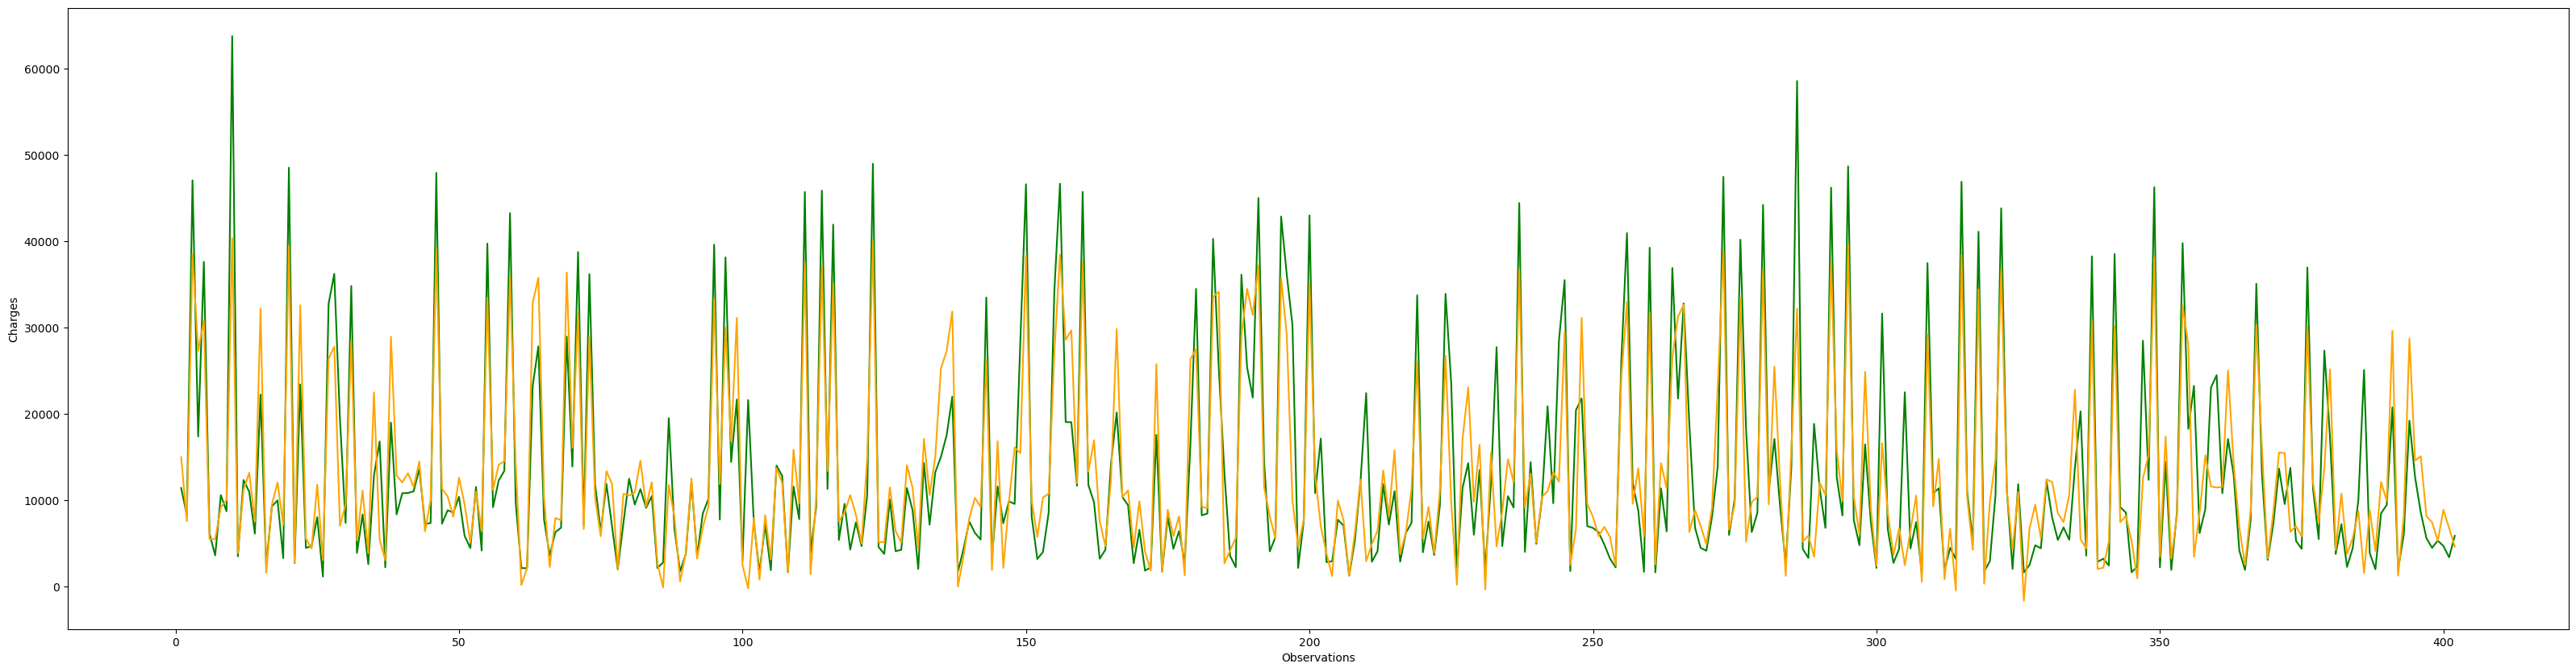

In [85]:
x = np.linspace(1, 402, 402, dtype = int)
plt.figure(figsize=(40, 10))
plt.plot(x, y_test, color='green')
plt.plot(x, y_predict_fin, color = 'orange')
plt.xlabel('Observations')
plt.ylabel('Charges')
plt.savefig('Predicted vs Real');

# Principal Component Analysis

In [63]:
#from sklearn.decomposition import PCA

In [64]:
#model = PCA = PCA(n_components = 2)
#model.fit(X_train)

In [65]:
#X_2D = model.transform(X_train)

In [66]:
#X_2D

In [67]:
"""
X_train['PCA1'] = X_2D[:, 0]
X_train['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='smoker', data=X_train, fit_reg=False)
"""

'\nX_train[\'PCA1\'] = X_2D[:, 0]\nX_train[\'PCA2\'] = X_2D[:, 1]\n\nsns.lmplot("PCA1", "PCA2", hue=\'smoker\', data=X_train, fit_reg=False)\n'